# Geometric Transformation Examples with Pillow

In [1]:
import numpy as np
from PIL import Image

## Resize

In [2]:
## Resize

In [3]:
img_path = '../Images/Traffic/segment-12212767626682531382_2100_150_2120_150_with_camera_labels_20.png'

In [5]:
img = Image.open(img_path)
print(f"Image size is {img.size}")

Image size is (1920, 1280)


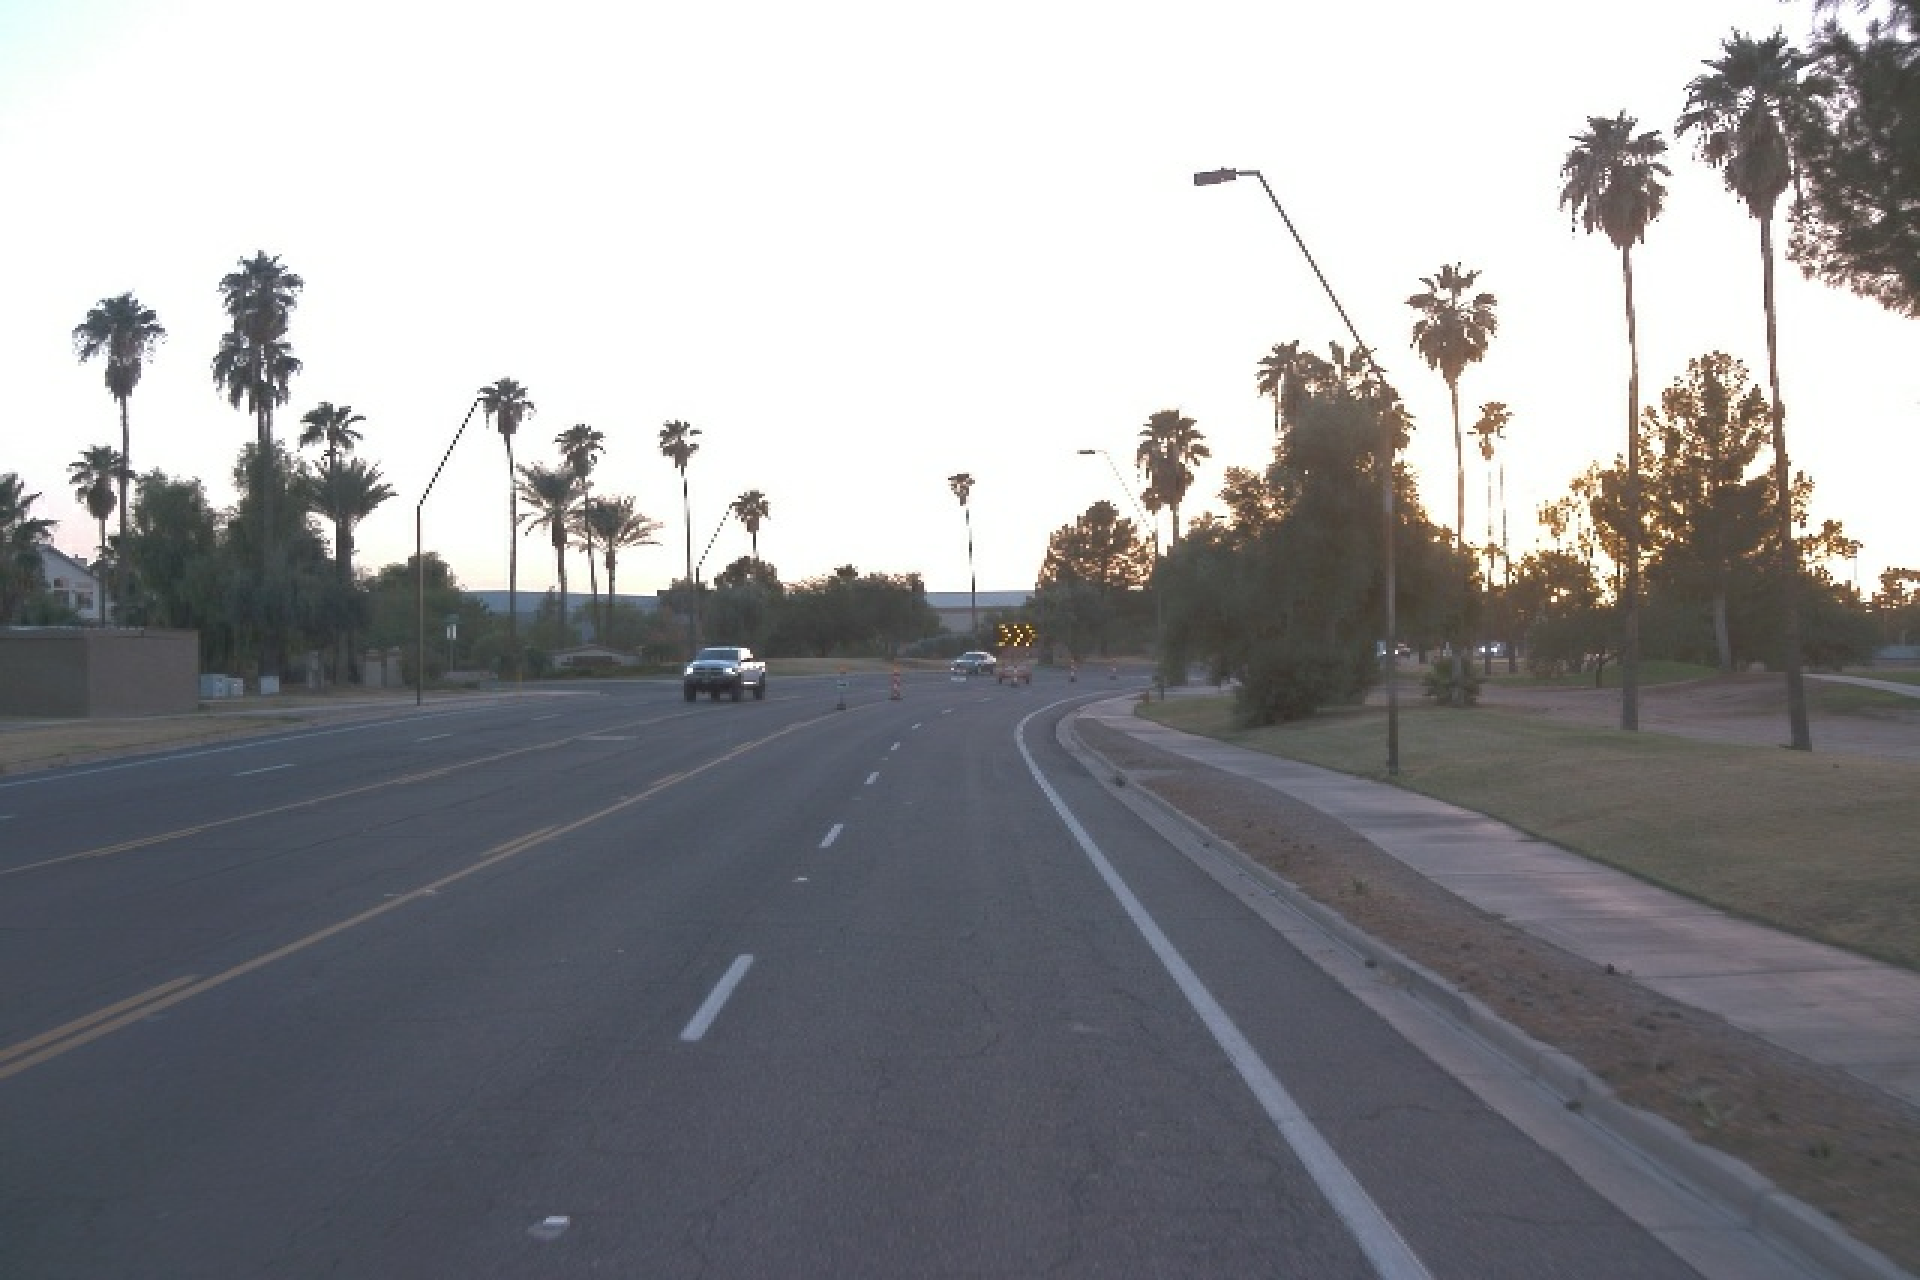

In [6]:
img

In [7]:
img_resized = img.resize((640, 480))
print(f"The new Image size is {img_resized.size}")

The new Image size is (640, 480)


## Affine Transformation

An affine transformation is a geometric transformation that preserves lines and parallelism (but not necessarily distances and angles)

Resizing is a specific type of affine transformation. It uses the following transformation matrix:

$$
\left(\begin{array}{ccc} 
c_{x} & 0 & 0\\
0 & c_{y} & 0\\
0 & 0 & 1\\
\end{array}\right)
$$ 

In Pillow, use $c_{x} = 0.5$ and $c_{y} = 0.5$ to divide each dimension of the image by 2.


In [9]:
transformation_matrix = np.array([[0.5, 0, 0],[0, 0.5, 0],[0, 0, 1]])
transformation_matrix_inverse = np.linalg.inv(transformation_matrix)

In [10]:
img_transformed = img.transform((960, 640), method=Image.AFFINE, data=transformation_matrix_inverse.flatten())
print(f'The image size is {img_transformed.size}')

The image size is (960, 640)


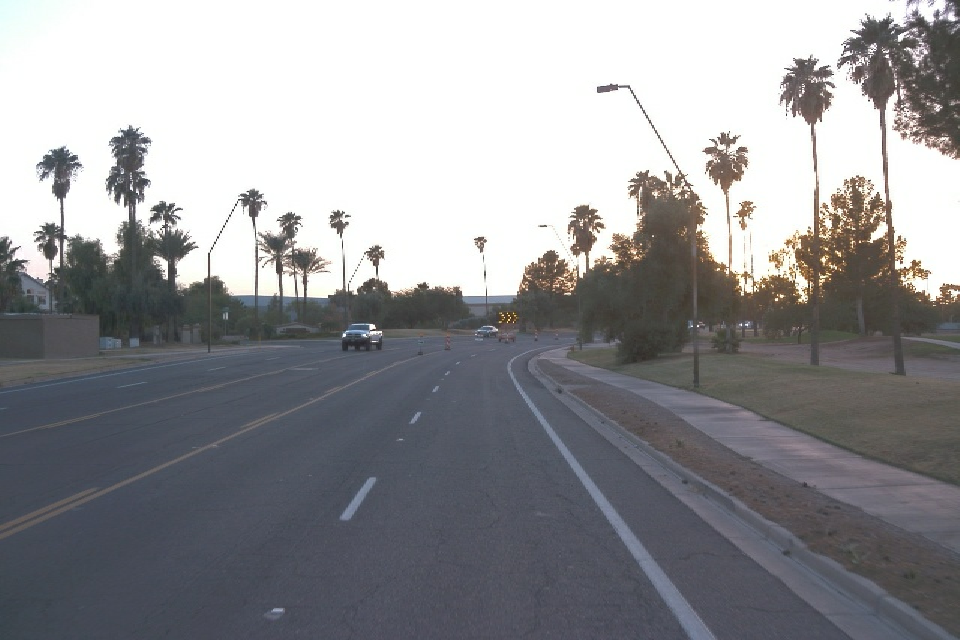

In [11]:
img_transformed

## Translate

Use the same function to perform rotation

$$
\left(\begin{array}{ccc} 
1 & 0 & t_{x}\\
0 & 1 & t_{y}\\
0 & 0 & 1\\
\end{array}\right)
$$ 

For example, to translate the image by 200 pixels right and 100 pixels down, respectively, use $t_{x}=200$ and  $t_{y}=100$

In [12]:
transformation_matrix = np.array([[1, 0, 200], [0, 1, 100], [0, 0, 1]])
transformation_matrix_inverse = np.linalg.inv(transformation_matrix)

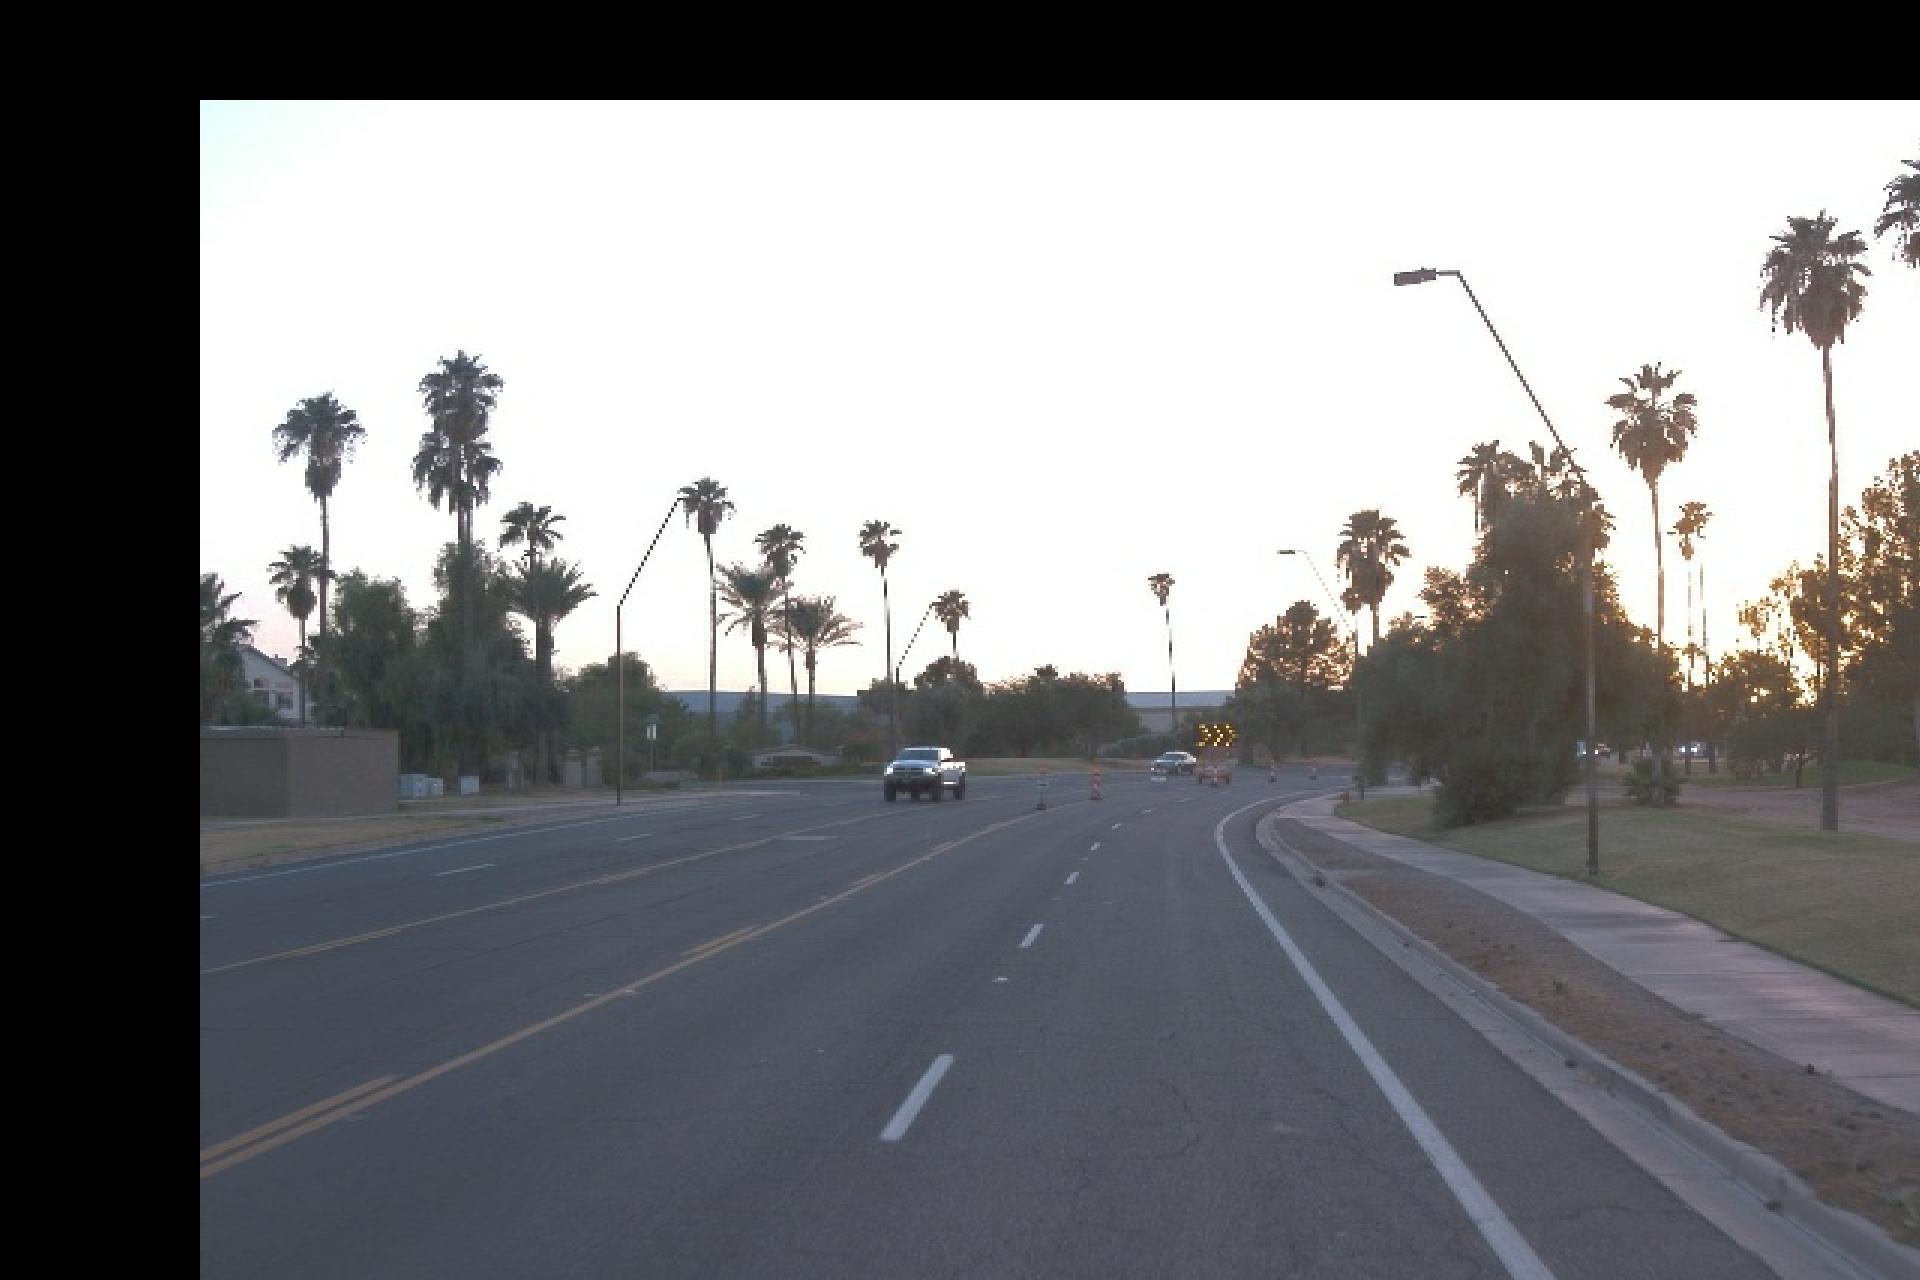

In [13]:
img.transform(img.size, method=Image.AFFINE, data=transformation_matrix_inverse.flatten())

## Shear

Use the same function to perform horizontal or vertical shearing:

$$
\left(\begin{array}{ccc} 
1 & s_{x} & 0\\
s_{y} & 1 & 0\\
0 & 0 & 1\\
\end{array}\right)
$$ 

In [14]:
transformation_matrix = np.array([[1, 0.1, 0], [0, 1, 0], [0, 0, 1]])
transformation_matrix_inverse = np.linalg.inv(transformation_matrix)

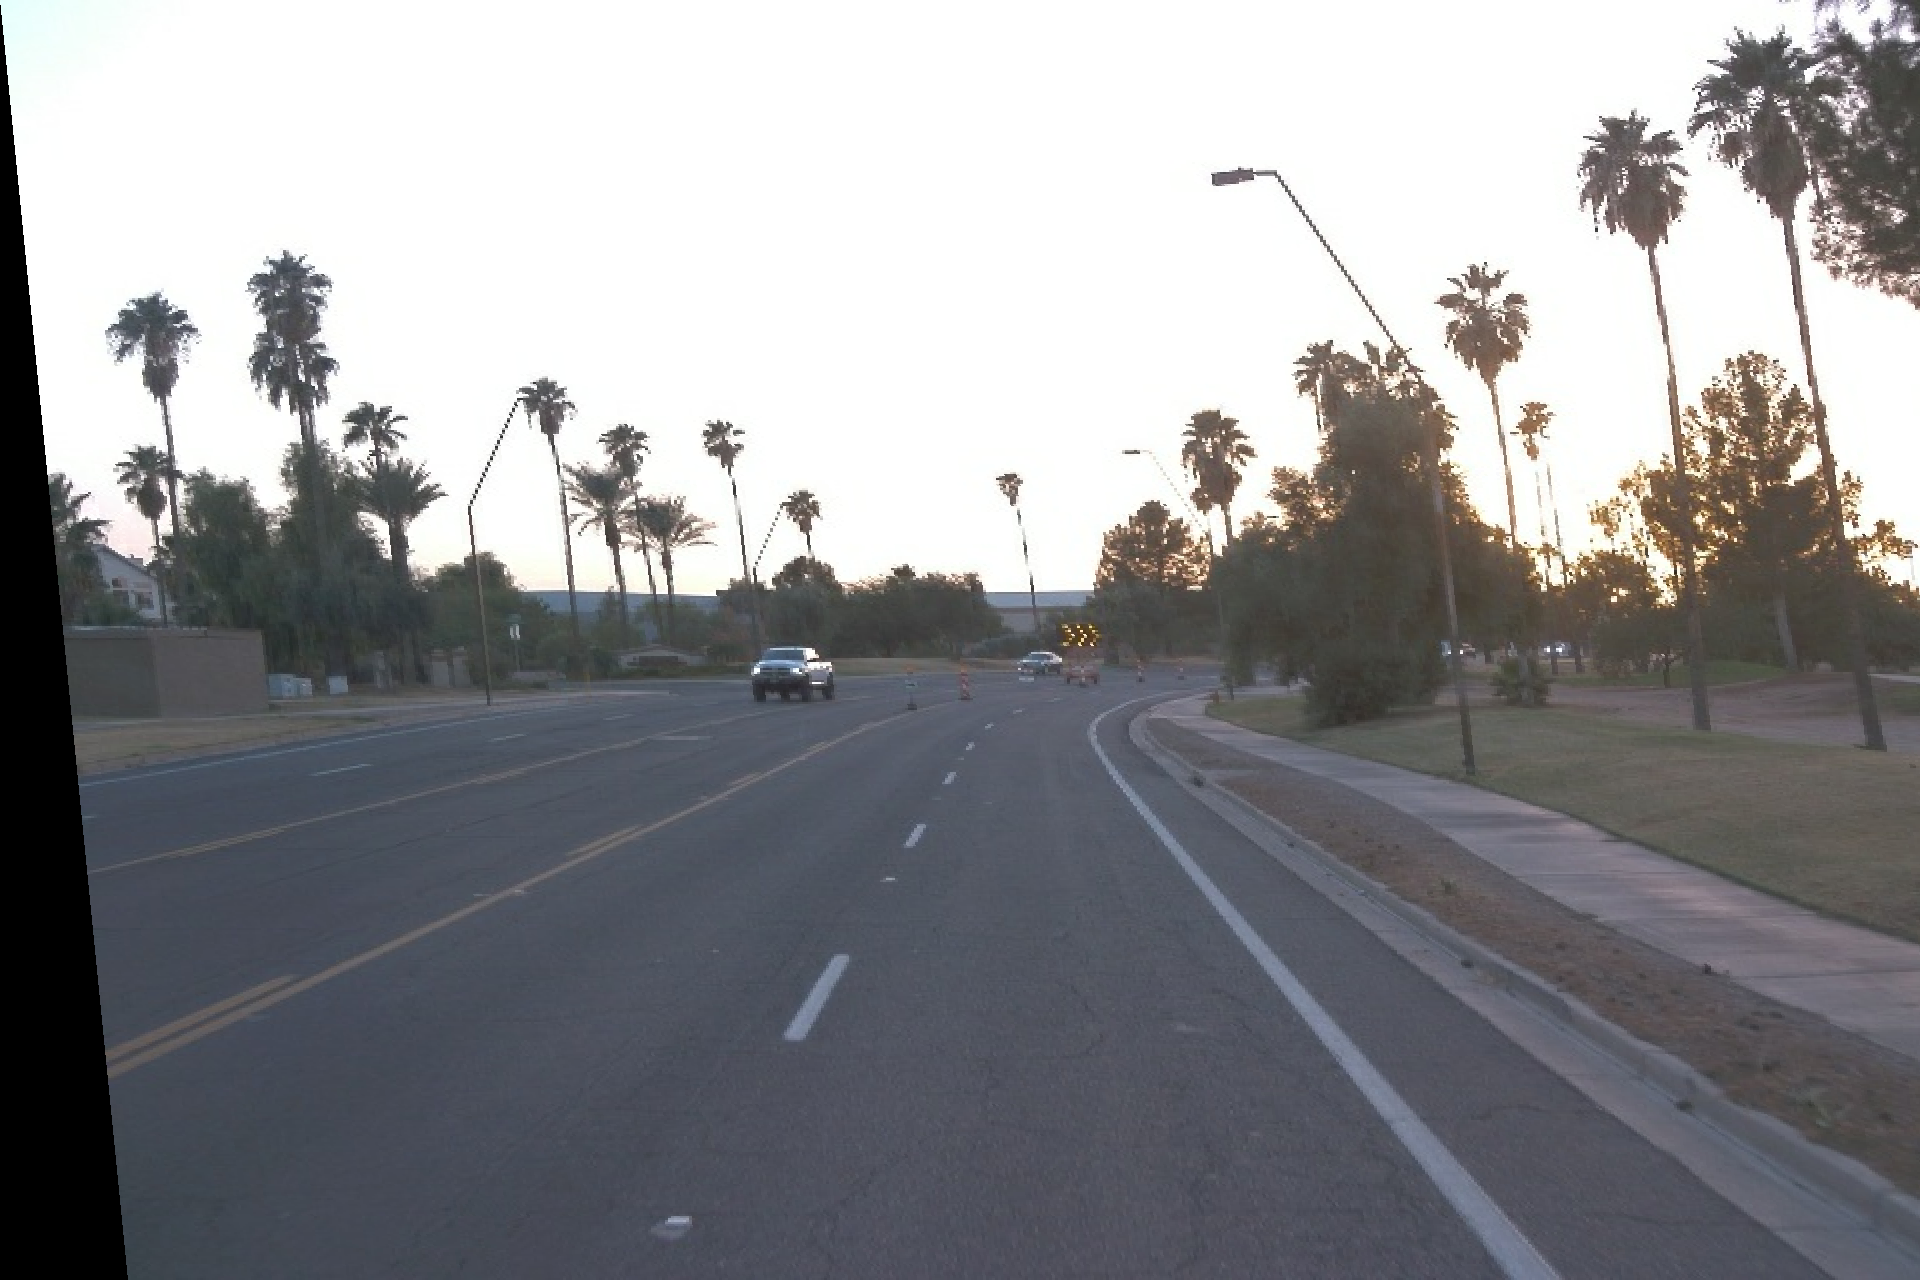

In [15]:
img.transform(img.size, method=Image.AFFINE, data=transformation_matrix_inverse.flatten())

## Combination

In [16]:
translation = np.array([[1, 0, 200], [0, 1, 100], [0, 0, 1]])
shearing = np.array([[1, 0.1, 0], [0, 1, 0], [0, 0, 1]])
transformation_matrix = translation @ shearing
transformation_matrix_inverse = np.linalg.inv(transformation_matrix)

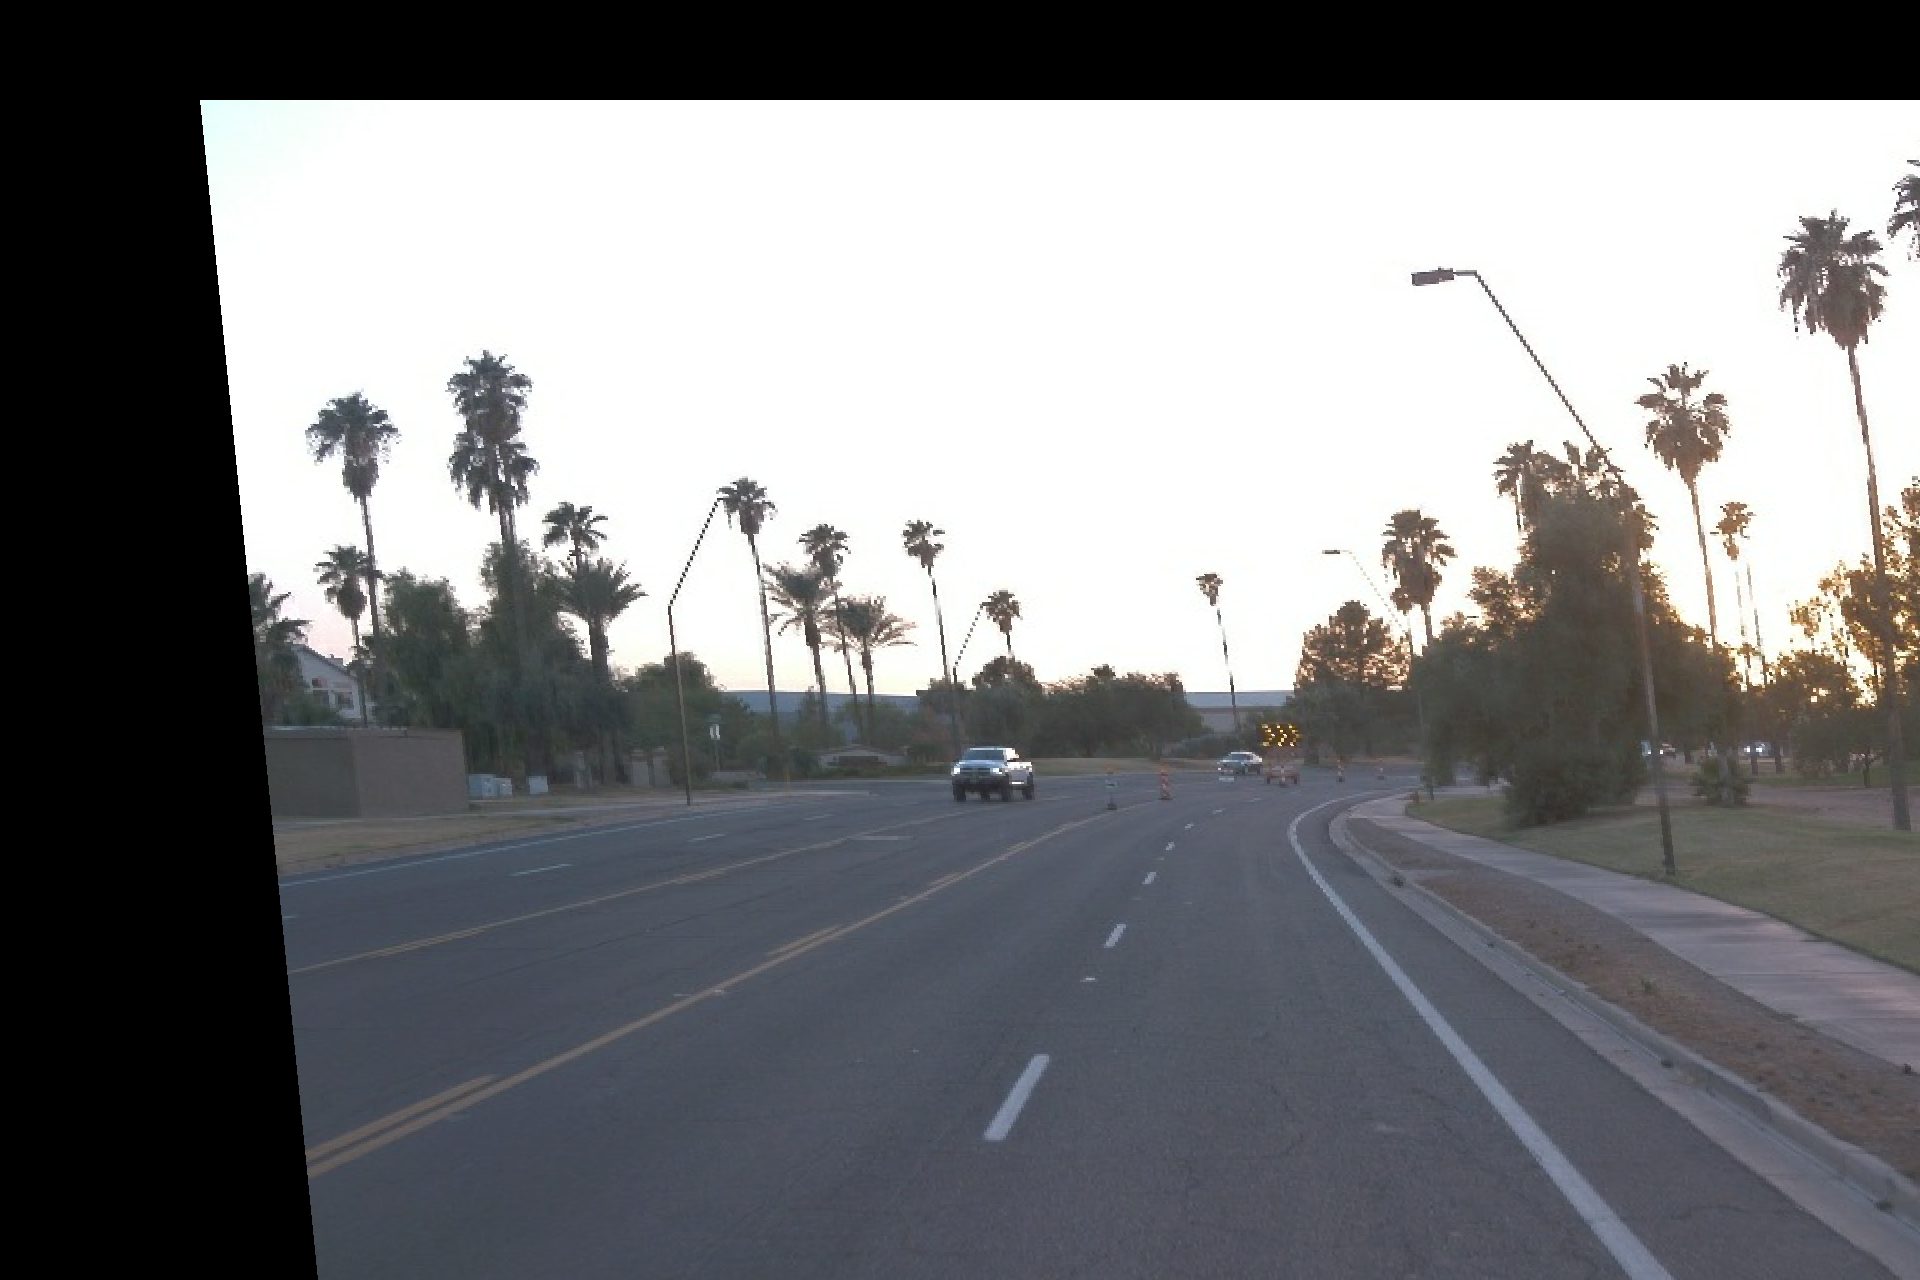

In [17]:
img.transform(img.size, method=Image.AFFINE, data=transformation_matrix_inverse.flatten())